In [11]:
import pandas as pd
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.lib.image as gnbimage
from IPython.display import Image


In [12]:
def _readData(filename: str='both_test_balanced.csv'):
    df = pd.read_csv(filename)
    #to prevent errors when we save as an image
    df.columns = [
        column.replace(" ","").replace("-","_").strip() for column in df.columns
    ]
    df.drop("Areyouahealthprofessional?", inplace=True, axis=1)
    return df

In [13]:
def _learnData(df, bn, algorithm, *args, **kwargs):
    learner = gum.BNLearner(df, bn)
    algorithm(learner, *args, **kwargs)
    return learner.learnBN()

In [14]:
#load data from csv
df = _readData()
df.head(6)

,Symptom_ThroatPain,Symptom_Dyspnea,Symptom_Fever,Symptom_Cough,Symptom_Headache,Symptom_TasteDisorders,Symptom_OlfactoryDisorders,Symptom_Coryza,Gender,Class
0,0,1,0,0,1,1,1,1,1,0
1,1,1,1,1,1,0,0,1,0,0
2,0,1,0,0,0,0,0,1,1,0
3,0,1,0,0,1,0,0,0,0,0
4,1,0,0,0,1,0,0,1,0,0
5,1,1,1,1,1,0,0,1,0,0


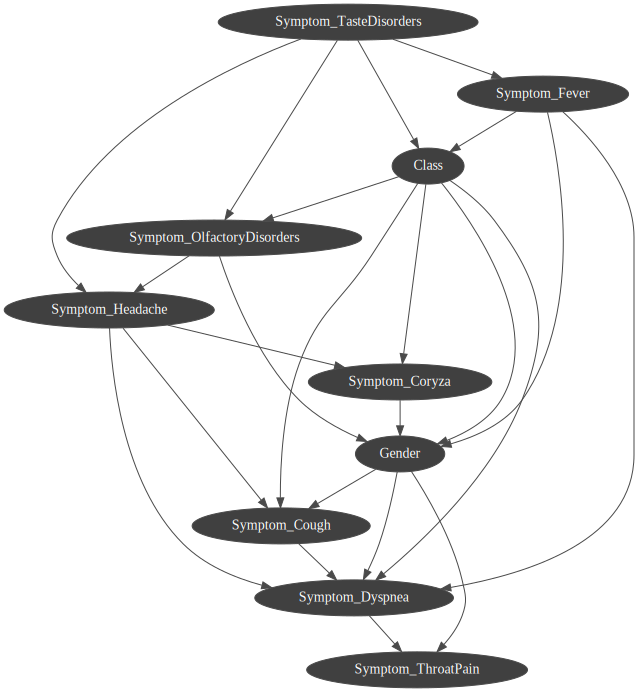

In [15]:
# create a bayesnetword from the loaded data
bayesnet = gum.BayesNet("Barzilian covid data")
nodes = {col: bayesnet.add(gum.LabelizedVariable(col,col, 2)) for col in df.columns}

# learn the bn from the data
bn = _learnData(df, bayesnet, gum.BNLearner.useGreedyHillClimbing)
gnb.showBN(bn, size="10")
gum.saveBN(bn, "out/covid.net")
#creation d'une image
gnbimage.export(bn,"out/covid1.png")

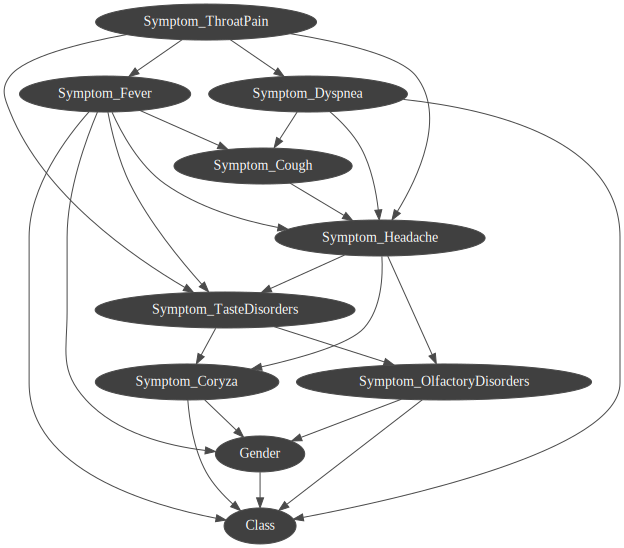

In [16]:
#2nd learning algorithm
# learn the bn from the data
bn = _learnData(df, bayesnet, gum.BNLearner.useK2, [*nodes.values()])
gnb.showBN(bn, size="10")
gum.saveBN(bn, "out/covid.net")
#creation d'une image
gnbimage.export(bn,"out/covid.png")

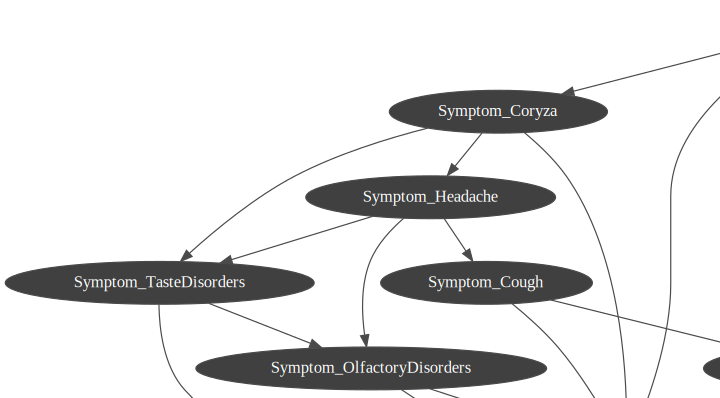

In [17]:
#3rd learning algorithm
# learn the bn from the data
bn = _learnData(df, bayesnet, gum.BNLearner.useLocalSearchWithTabuList)
gnb.showBN(bn, size="10")
#creation d'une image
gnbimage.export(bn,"out/covid3.png")

In [18]:
#Probabilités des cas données